# Graduate School Admissions Analysis

This dataset includes information about Graduate School Admissions. It was retrieved from Kaggle at this <a href="https://www.kaggle.com/mohansacharya/graduate-admissions">link</a>. I will first explore the data with several visualizations and then run a Logistic Regression, a Decision Tree Analysis and a Random Forest Analysis.

In [597]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style='whitegrid',font='SimSun',palette='Spectral')

In [598]:
data = pd.read_csv('Admission_Predict.csv',index_col='Serial No.')

In [599]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [600]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [601]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# How correlated are the variables?

All the variables except Research are strongly correlated with one another. Research is moderately correlated with the other variables.

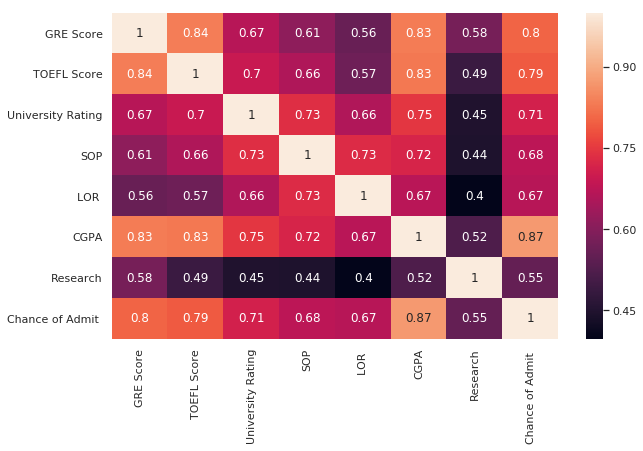

In [602]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

# Distribution of Variables

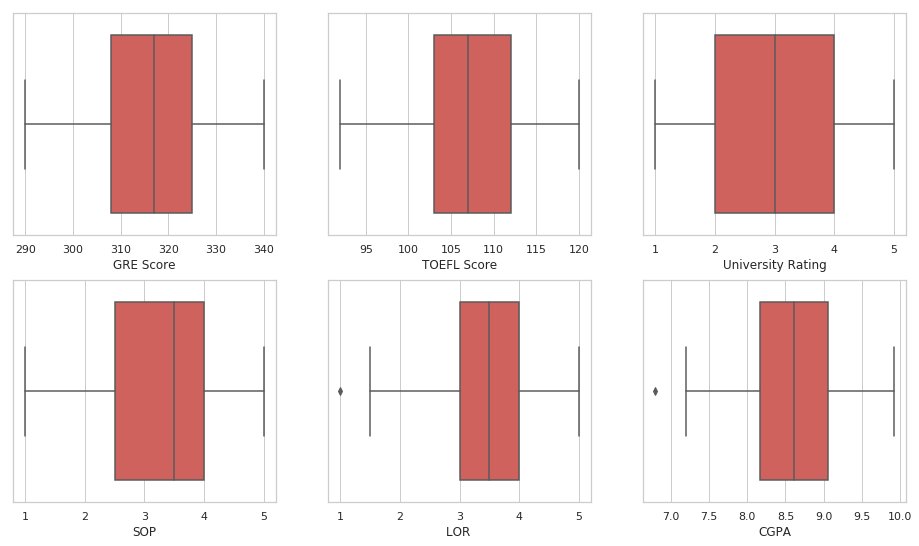

In [603]:
columns = list(data.columns.drop('Chance of Admit '))
plt.figure(figsize=(16,9))
for i in range(len(columns)-1):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=columns[i],data=data)

# Relationship Between the Variables and Chance of Admit Score

The line plots below show a linear relation between all the variables and the chance of admission score. It also reiterates what the correlation heat map above demonstrates, that all of these variables have are positvely correlated with the chance of admission score.

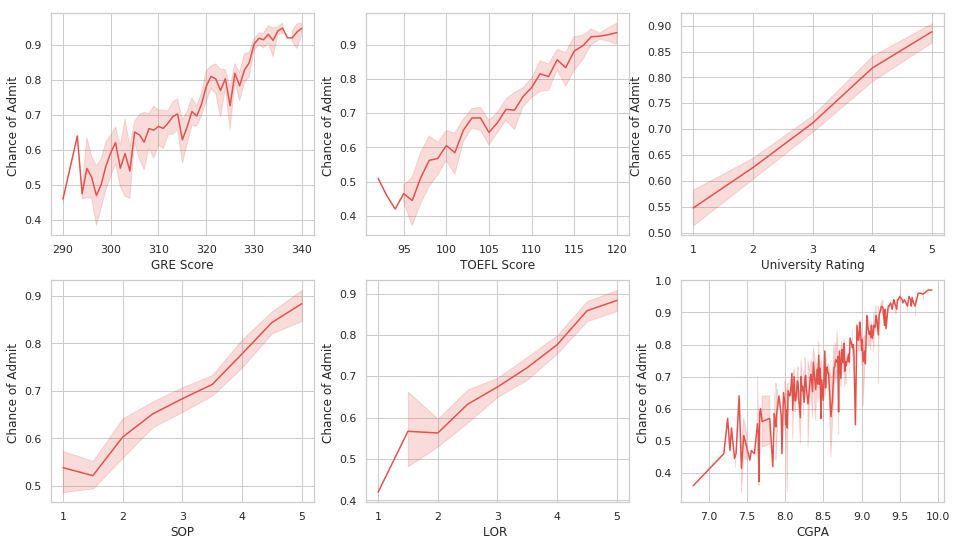

In [604]:
columns = list(data.columns.drop('Chance of Admit '))
plt.figure(figsize=(16,9))
for i in range(len(columns)-1):
    plt.subplot(2,3,i+1)
    sns.lineplot(x=columns[i],y='Chance of Admit ',data=data)

# Data Cleaning

First I made the chance of admission variable binary. I chose a cutoff score of 80% with above 80% as admission into a graduate program and below 80% as not admitted. 

In [605]:
def makeCat(value):
    if value >= 0.8:
        return 1
    else:
        return 0

In [606]:
data['AdmitCat'] = data['Chance of Admit '].apply(lambda x: makeCat(x))

Standardizing the data transforms all of the data onto the same scale and helps to optimize the classifier.

In [607]:
from sklearn.preprocessing import StandardScaler

In [608]:
scaler = StandardScaler()

In [609]:
scaler.fit(data.drop(['AdmitCat','Chance of Admit '],axis=1))
scaled_features = scaler.transform(data.drop(['AdmitCat','Chance of Admit '],axis=1))
scaledData = pd.DataFrame(scaled_features,columns=data.columns[:7])
scaledData.head()

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975


# Logistic Regression

In [610]:
from sklearn.model_selection import train_test_split

In [643]:
X = scaledData
y = data['AdmitCat']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.35)

In [644]:
from sklearn.linear_model import LogisticRegression

In [645]:
logModel = LogisticRegression()

In [646]:
logModel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [647]:
predictions = logModel.predict(X_test)

In [648]:
from sklearn.metrics import confusion_matrix,classification_report

In [649]:
print confusion_matrix(y_test,predictions)
print classification_report(y_test,predictions)

[[83  3]
 [ 3 51]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        86
           1       0.94      0.94      0.94        54

   micro avg       0.96      0.96      0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



In [650]:
log_acc = (logModel.score(X_test,y_test))*100
log_acc

95.71428571428572

# Decision Tree 

In [651]:
from sklearn.tree import DecisionTreeClassifier

In [652]:
dtreeModel = DecisionTreeClassifier()

In [653]:
dtreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [654]:
dtreePred = dtreeModel.predict(X_test)

In [655]:
print confusion_matrix(y_test,dtreePred)
print classification_report(y_test,dtreePred)

[[79  7]
 [ 7 47]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        86
           1       0.87      0.87      0.87        54

   micro avg       0.90      0.90      0.90       140
   macro avg       0.89      0.89      0.89       140
weighted avg       0.90      0.90      0.90       140



In [656]:
dt_acc = (dtreeModel.score(X_test,y_test))*100
dt_acc

90.0

Below we can see that the model is weighting the students' undergraduate GPA the most in predicting admission.

Text(0.5,1,'Decision Tree Model Feature Importance')

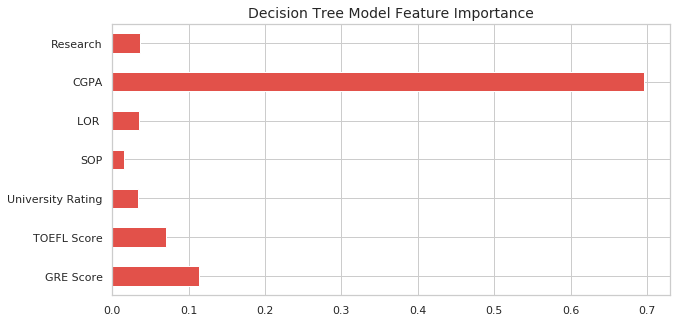

In [657]:
plt.figure(figsize=(10,5))
dTreeFeatures = pd.Series(dtreeModel.feature_importances_,index=data.columns[:7])
dTreeFeatures.plot(kind='barh')
plt.title('Decision Tree Model Feature Importance',fontsize=14)

In [658]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(data.columns[:7])

This figure isn't very intuitive but we can map out the decision tree model

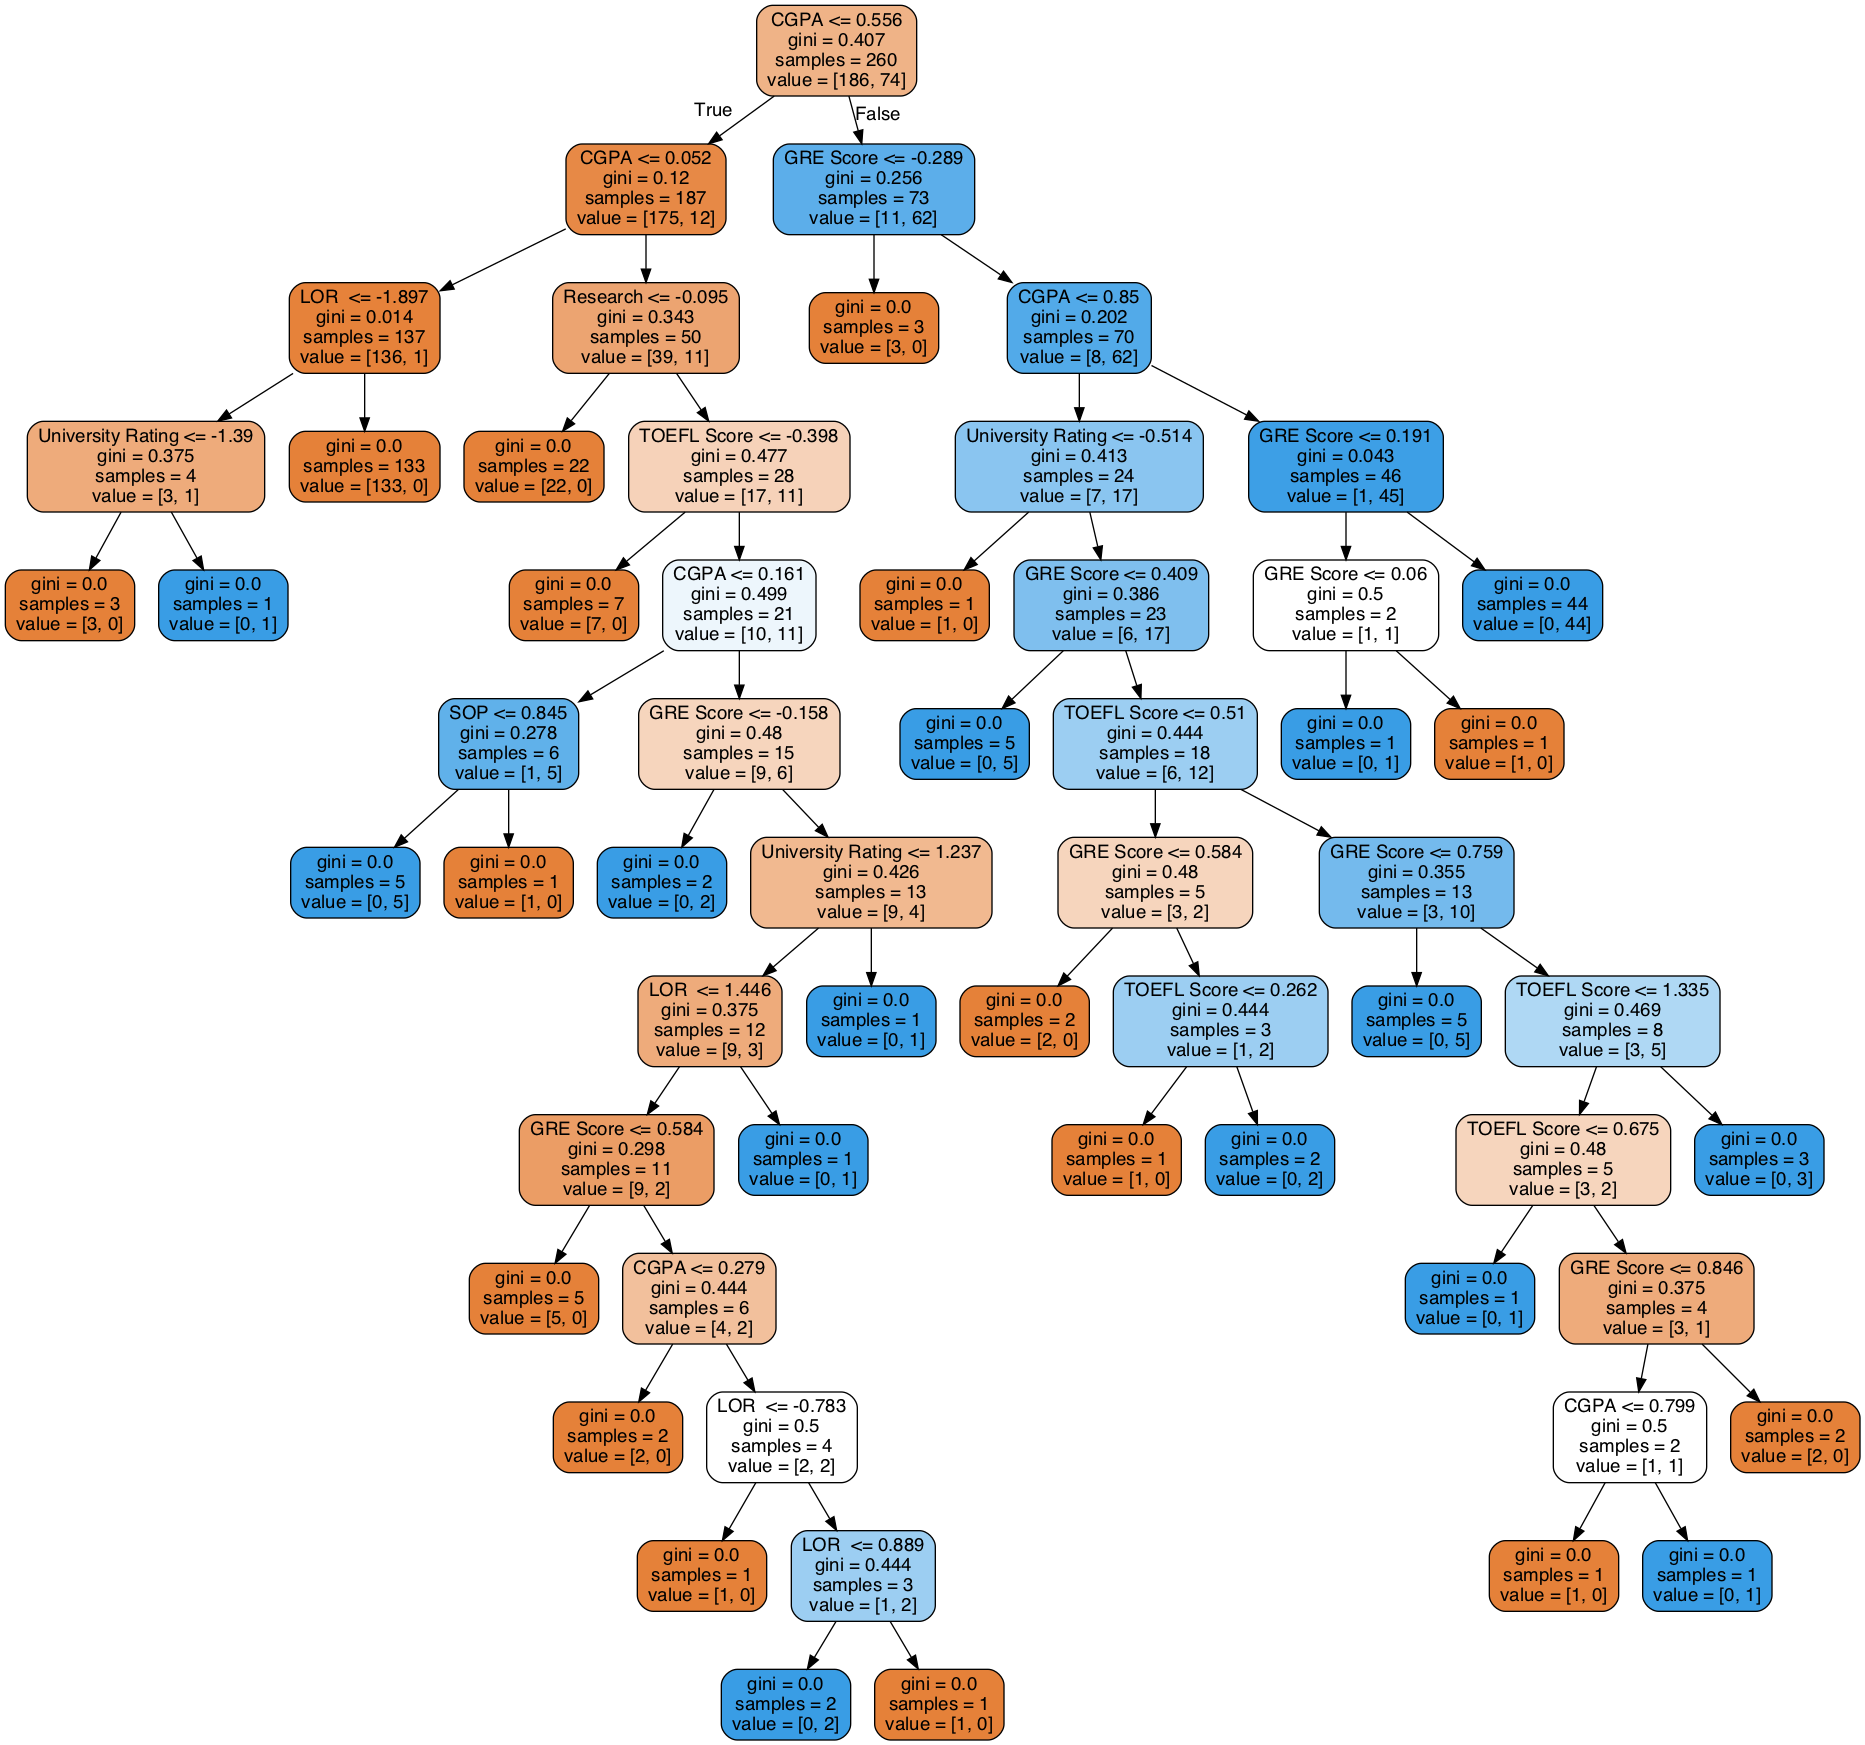

In [659]:
dot_data = StringIO()  
export_graphviz(dtreeModel, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Random Forest 

In [660]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [661]:
rfcPred = rfc.predict(X_test)

In [662]:
print confusion_matrix(y_test,rfcPred)
print classification_report(y_test,rfcPred)

[[81  5]
 [ 4 50]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        86
           1       0.91      0.93      0.92        54

   micro avg       0.94      0.94      0.94       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.94      0.94      0.94       140



In [663]:
rfc_acc = (rfc.score(X_test,y_test))*100
rfc_acc

93.57142857142857

Like the Decision Tree Model, this model is weighting undergraduate gpa the most in the making the admission decision. 

Text(0.5,1,'Random Forest Model Feature Importance')

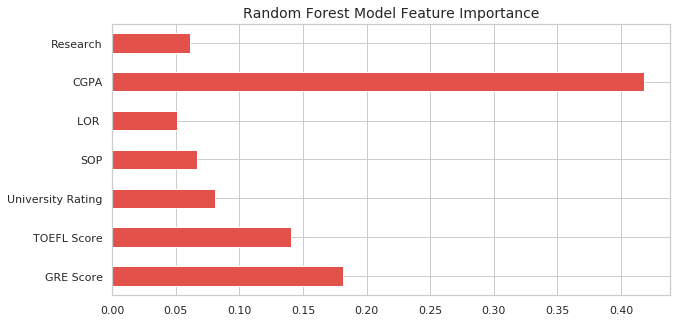

In [664]:
plt.figure(figsize=(10,5))
rfcFeatures = pd.Series(rfc.feature_importances_,index=data.columns[:7])
rfcFeatures.plot(kind='barh')
plt.title('Random Forest Model Feature Importance',fontsize=14)

In [665]:
print 'Logistic Regression Acc:', log_acc
print 'Decision Tree Acc', dt_acc
print 'Random Forest Acc', rfc_acc

Logistic Regression Acc: 95.71428571428572
Decision Tree Acc 90.0
Random Forest Acc 93.57142857142857


The Logistic Regression Model performed the best with 95.71% accuracy

Thanks for checking this out! - Brittany Corbett